<a href="https://colab.research.google.com/github/gferew1/IntroML/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss 675.794373
Epoch 2, Loss 401.575378
Epoch 3, Loss 240.907486
Epoch 4, Loss 146.769318
Epoch 5, Loss 91.610870
Epoch 6, Loss 59.290676
Epoch 7, Loss 40.351440
Epoch 8, Loss 29.252113
Epoch 9, Loss 22.746195
Epoch 10, Loss 18.931561
Epoch 11, Loss 16.693748
Epoch 12, Loss 15.379800
Epoch 13, Loss 14.607144
Epoch 14, Loss 14.151642
Epoch 15, Loss 13.881952
Epoch 16, Loss 13.721137
Epoch 17, Loss 13.624115
Epoch 18, Loss 13.564467
Epoch 19, Loss 13.526721
Epoch 20, Loss 13.501810
...
Epoch 99, Loss 12.956314
Epoch 100, Loss 12.949912
...
Epoch 4000, Loss 4.194724
Epoch 5000, Loss 3.861744


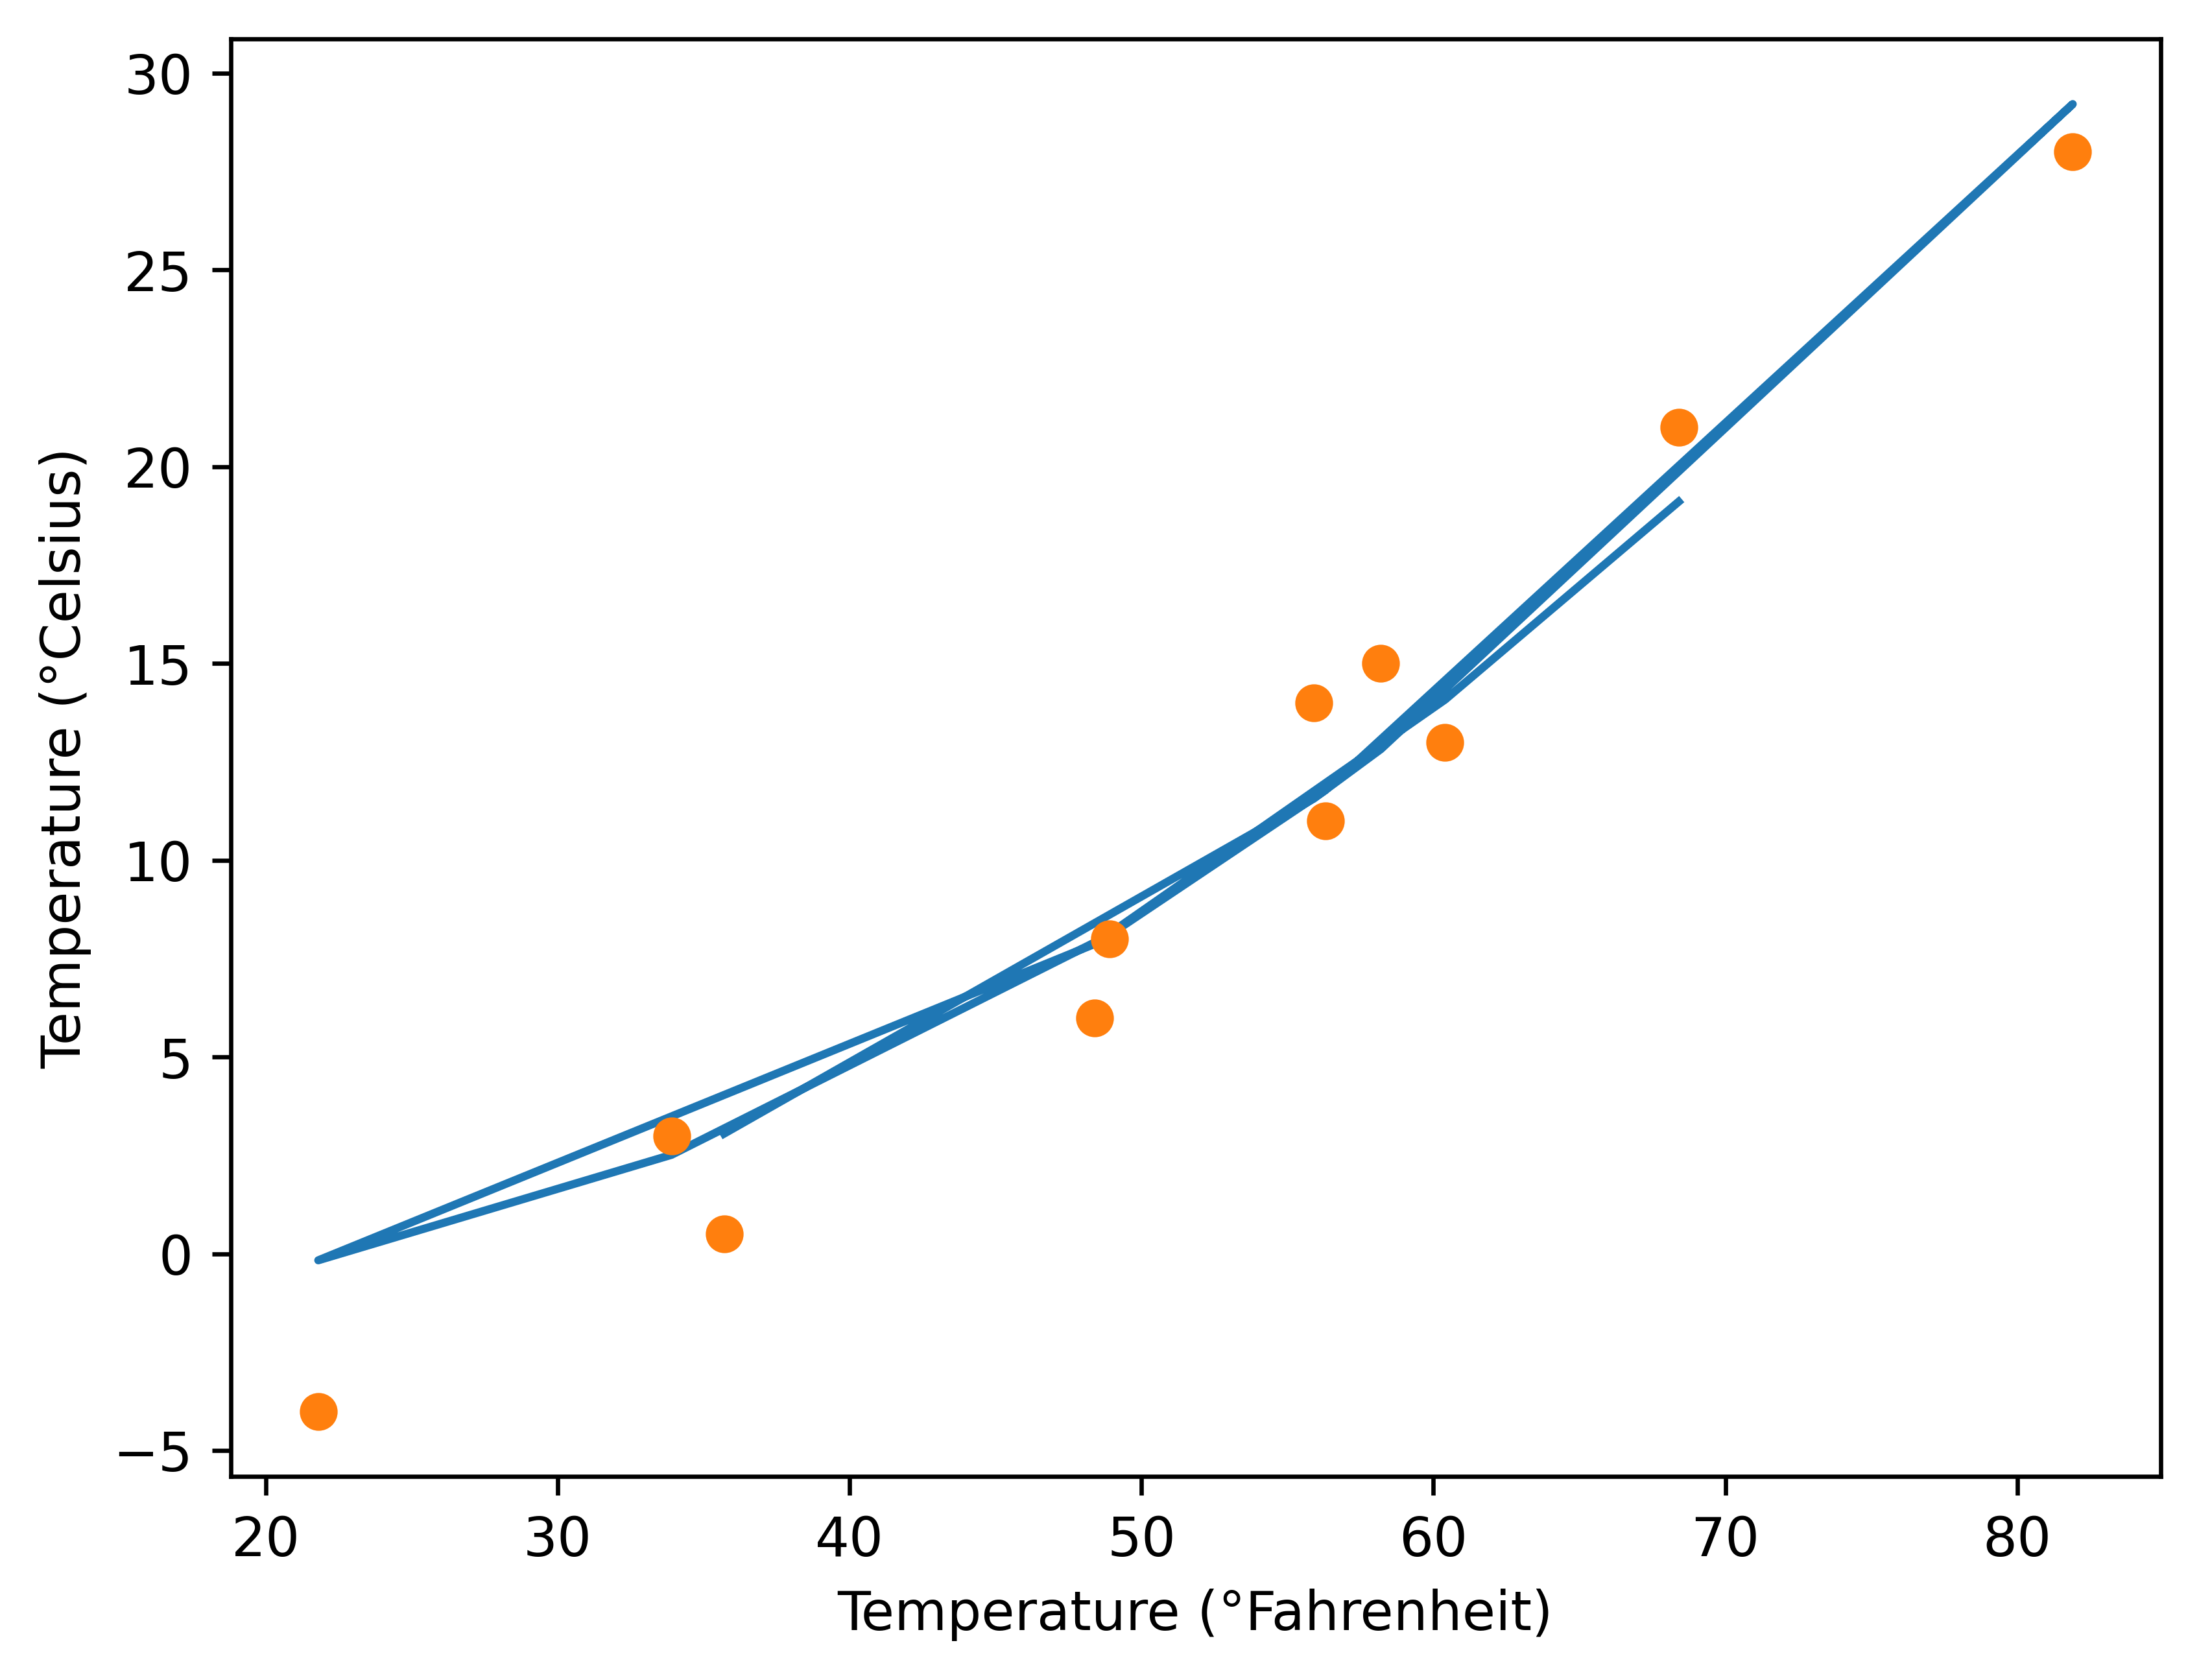

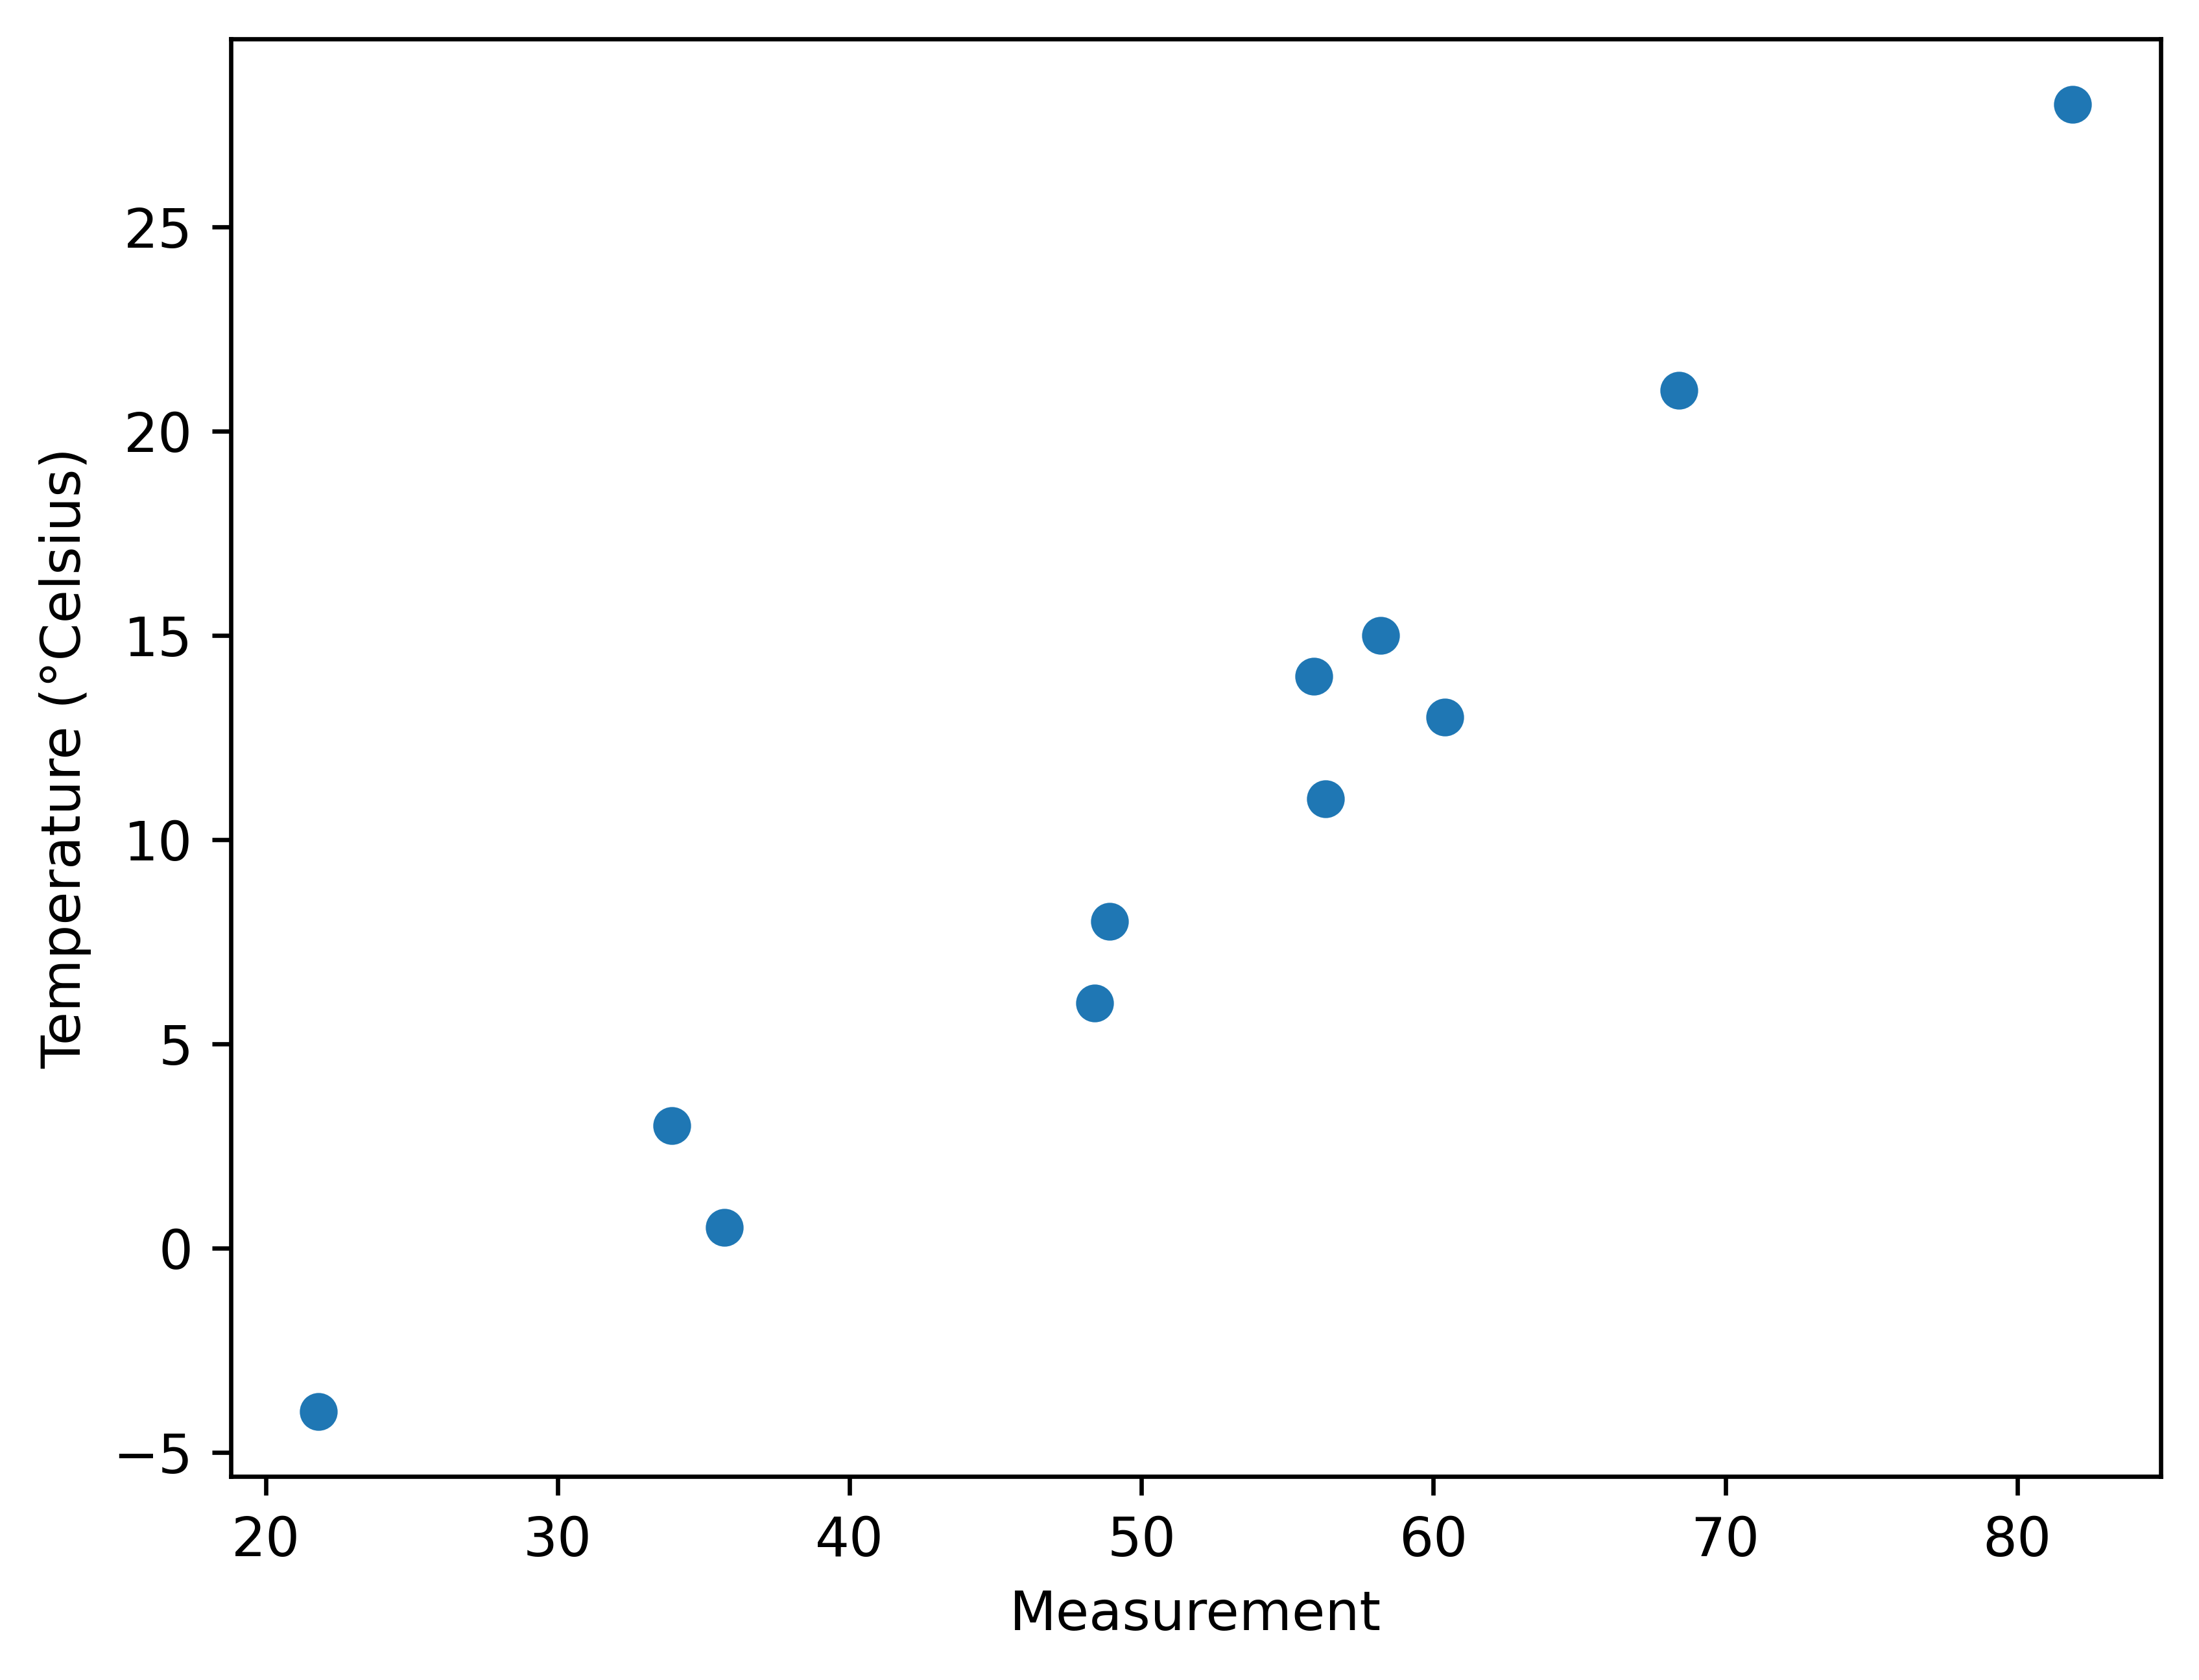

In [32]:
import numpy as np
import torch
from torch.optim import SGD
from matplotlib import pyplot as plt

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c, dtype=torch.float32)
t_u = torch.tensor(t_u, dtype=torch.float32)

def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop_sgd(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    optimizer = SGD(params, lr=learning_rate)

    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params

        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters using the optimizer

        if epoch in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 99, 100, 4000, 5000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
        if epoch in {21, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break

    return params

# Set requires_grad=True for the initial parameters
w2 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Use a list for the parameters
params = [w2, w1, b]

t_un = 0.1 * t_u

params = training_loop_sgd(
    n_epochs=5000,
    learning_rate=1e-4,
    params=params,
    t_u=t_un,
    t_c=t_c,
    print_params=False
)

# Visualization
t_p = model(t_un, *params)

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("nonlinear_temp_unknown_plot.png", format="png")



%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")


1.B

In [75]:
###### problem 1b

import numpy as np
import torch
from torch.optim import SGD
from matplotlib import pyplot as plt

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c, dtype=torch.float32)
t_u = torch.tensor(t_u, dtype=torch.float32)

def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop_sgd(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    optimizer = SGD(params, lr=learning_rate)
    loss_values = []

    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params

        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()  # Zero the gradients
        loss.backward()  # Backward pass
        optimizer.step()  # Update parameters using the optimizer

        if epoch % 100 == 0:
            loss_values.append(loss.item())

        if epoch in {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 99, 100, 400, 500}:
            print(f'Epoch {epoch}, Loss {loss.item()}')
            if print_params:
                print('    Params:', params)
        if epoch in {21, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break

    return loss_values

learning_rates = [0.1, 0.01, 0.001, 0.0001]
all_loss_values = []

for lr in learning_rates:
    w2 = torch.tensor(1.0, requires_grad=True)
    w1 = torch.tensor(1.0, requires_grad=True)
    b = torch.tensor(0.0, requires_grad=True)
    params = [w2, w1, b]

    print(f"\nTraining with learning rate: {lr}")
    loss_values = training_loop_sgd(
        n_epochs=500,
        learning_rate=lr,
        params=params,
        t_u=t_u * 0.1,
        t_c=t_c,
        print_params=False
    )

    all_loss_values.append(loss_values)




Training with learning rate: 0.1
Epoch 1, Loss 675.7943725585938
Epoch 2, Loss 36122168.0
Epoch 3, Loss 1970450333696.0
Epoch 4, Loss 1.0748732901844582e+17
Epoch 5, Loss 5.863393980860607e+21
Epoch 6, Loss 3.1984595567173737e+26
Epoch 7, Loss 1.7447477347729545e+31
Epoch 8, Loss 9.517532590737923e+35
Epoch 9, Loss inf

Training with learning rate: 0.01
Epoch 1, Loss 675.7943725585938
Epoch 2, Loss 333932.125
Epoch 3, Loss 168384016.0
Epoch 4, Loss 84910268416.0
Epoch 5, Loss 42817330085888.0
Epoch 6, Loss 2.1591311698100224e+16
Epoch 7, Loss 1.0887759962423951e+19
Epoch 8, Loss 5.490324231978536e+21
Epoch 9, Loss 2.768581890145707e+24
Epoch 10, Loss 1.3961005045119823e+27
Epoch 11, Loss 7.04005635120792e+29
Epoch 12, Loss 3.5500580591904875e+32
Epoch 13, Loss 1.7901728104453987e+35
Epoch 14, Loss inf

Training with learning rate: 0.001
Epoch 1, Loss 675.7943725585938
Epoch 2, Loss 1212.4979248046875
Epoch 3, Loss 2184.309814453125
Epoch 4, Loss 3943.9306640625
Epoch 5, Loss 7129.9594

**PROBLEM** 2

In [81]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'
housing = pd.read_csv(file_path)


binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[binary_columns] = housing[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))


train_data, test_data = train_test_split(housing, train_size=0.8, test_size=0.2, random_state=100)


scaler = MinMaxScaler()
num_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
train_data[num_columns] = scaler.fit_transform(train_data[num_columns])


X_train = torch.tensor(train_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values, dtype=torch.float32)
y_train = torch.tensor(train_data['price'].values, dtype=torch.float32)

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


criterion = nn.MSELoss()


def training_loop(n_epochs, model, optimizer, criterion, X_train, y_train, X_val, y_val):
    for epoch in range(1, n_epochs + 1):

        predictions = model(X_train)
        loss = criterion(predictions.view(-1), y_train)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if epoch <= 2 or epoch % 500 == 0:
            with torch.no_grad():
                val_predictions = model(X_val)
                val_loss = criterion(val_predictions.view(-1), y_val)
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")


learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    for optimizer_type in ['SGD', 'Adam']:
        model = LinearRegressionModel(input_size)

        if optimizer_type == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)
        elif optimizer_type == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)

        val_data, _ = train_test_split(test_data, train_size=0.8, test_size=0.2, random_state=100)

        val_data[num_columns] = scaler.transform(val_data[num_columns])
        X_val = torch.tensor(val_data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values, dtype=torch.float32)
        y_val = torch.tensor(val_data['price'].values, dtype=torch.float32)

        print(f"\nTraining with learning rate: {lr}, Optimizer: {optimizer_type}")
        training_loop(n_epochs=5000, model=model, optimizer=optimizer, criterion=criterion,
                      X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)








Training with learning rate: 0.1, Optimizer: SGD
Epoch 1, Loss: 0.0925, Validation Loss: 0.0776
Epoch 2, Loss: 0.0762, Validation Loss: 0.0691
Epoch 500, Loss: 0.0116, Validation Loss: 0.0115
Epoch 1000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 1500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 2000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 2500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 3000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 3500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 4000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 4500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 5000, Loss: 0.0114, Validation Loss: 0.0118

Training with learning rate: 0.1, Optimizer: Adam
Epoch 1, Loss: 0.0239, Validation Loss: 0.0419
Epoch 2, Loss: 0.0402, Validation Loss: 0.0229
Epoch 500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 1000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 1500, Loss: 0.0114, Validation Loss: 0.0118
Epoch 2000, Loss: 0.0114, Validation Loss: 0.0118
Epoch 2500, L

**Problem 3**

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/Housing.csv'


housing = pd.read_csv(file_path)


varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))


np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size=0.8, test_size=0.2, random_state=100)

scaler = MinMaxScaler()
num_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking','prefarea']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


y_train3 = df_train[num_vars].values[:, 0]
x_train3 = df_train[num_vars].values[:, 1:13]

y_train3 = torch.tensor(y_train3)
x_train3 = torch.tensor(x_train3)


def model3(params, x_train3):
    w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, w0, b = params
    return w10*x_train3[:,10] + w9*x_train3[:,9] + w8*x_train3[:,8] + w7*x_train3[:,7] + w6*x_train3[:,6] + w5*x_train3[:,5] + w4*x_train3[:,4] + w3*x_train3[:,3] + w2*x_train3[:,2] + w1*x_train3[:,1] + w0*x_train3[:,0] + b

def loss_fn3(t_p, y_train3):
    square_diff = (t_p - y_train3)**2
    return square_diff.mean()


w1 = torch.ones((), requires_grad=True)
w2 = torch.ones((), requires_grad=True)
w3 = torch.ones((), requires_grad=True)
w4 = torch.ones((), requires_grad=True)
w5 = torch.ones((), requires_grad=True)
w6 = torch.ones((), requires_grad=True)
w7 = torch.ones((), requires_grad=True)
w8 = torch.ones((), requires_grad=True)
w9 = torch.ones((), requires_grad=True)
w10 = torch.ones((), requires_grad=True)
b = torch.zeros((), requires_grad=True)


n_samples = x_train3.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_x3 = x_train3[train_indices]
train_y3 = y_train3[train_indices]

val_x3 = x_train3[val_indices]
val_y3 = y_train3[val_indices]


def training_loop(n_epochs, optimizer, params, train_x3, val_x3, train_y3, val_y3):
    for epoch in range(1, n_epochs + 1):
        train_t_p3 = model3(params, train_x3)
        train_loss3 = loss_fn3(train_t_p3, train_y3)

        with torch.no_grad():
            val_t_p3 = model3(params, val_x3)
            val_loss3 = loss_fn3(val_t_p3, val_y3)

        optimizer.zero_grad()
        train_loss3.backward()
        optimizer.step()

        if epoch <= 0 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss3.item():.4f}, Validation loss {val_loss3.item():.4f}")

    return params

# Training with SGD
print("SGD Learning rate 0.01:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)

# Training with SGD
print("SGD Learning rate 0.001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)

# Training with SGD
print("SGD Learning rate 0.0001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)


# Training with SGD
print("SGD Learning rate 0.00001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.00001
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)


# Training with Adam
print("Adam Learning rate 0.01:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)

print("Adam Learning rate 0.001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)

print("Adam Learning rate 0.001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)

print("Adam Learning rate 0.0001:")
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.00001
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(
    n_epochs=5000,
    optimizer=optimizer,
    params=params,
    train_x3=train_x3,
    val_x3=val_x3,
    train_y3=train_y3,
    val_y3=val_y3
)





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
SGD Learning rate 0.01:
Epoch 500, Training loss 0.0636, Validation loss 0.0652
Epoch 1000, Training loss 0.0236, Validation loss 0.0273
Epoch 1500, Training loss 0.0140, Validation loss 0.0176
Epoch 2000, Training loss 0.0108, Validation loss 0.0145
Epoch 2500, Training loss 0.0096, Validation loss 0.0133
Epoch 3000, Training loss 0.0090, Validation loss 0.0128
Epoch 3500, Training loss 0.0086, Validation loss 0.0126
Epoch 4000, Training loss 0.0084, Validation loss 0.0124
Epoch 4500, Training loss 0.0082, Validation loss 0.0123
Epoch 5000, Training loss 0.0081, Validation loss 0.0122
SGD Learning rate 0.001:
Epoch 500, Training loss 0.5257, Validation loss 0.5957
Epoch 1000, Training loss 0.3331, Validation loss 0.3166
Epoch 1500, Training loss 0.2492, Validation loss 0.2329
Epoch 2000, Training loss 0.1919, Validation loss 0.1803
Epoch 2500, Training loss 

tensor([ 0.9504,  0.9505,  0.9504,  0.9504,  0.9504,  0.9504,  0.9505,
         0.9505,  0.9504,  0.9505,  0.9505, -0.0495], requires_grad=True)